In [1]:
import pandas as pd

**Load train data**

In [2]:
df_jan_21 = pd.read_parquet('../data/fhv_tripdata_2021-01.parquet')

print(df_jan_21.shape)
df_jan_21.head()

(1154112, 7)


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [3]:
df_jan_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[ns]
 2   dropOff_datetime        1154112 non-null  datetime64[ns]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 61.6+ MB


In [4]:
df_jan_21['duration_min'] = \
                round((df_jan_21['dropOff_datetime'] - df_jan_21['pickup_datetime']).dt.total_seconds() / 60, 4)

df_jan_21.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration_min
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.0000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.0000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.0000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.2833
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.2167


**Q2. Average duration FHV January**

In [6]:
print('Average duration in Jan 21 - {:.2f} min.'.format(df_jan_21['duration_min'].mean()))

Average duration in Jan 21 - 19.17 min.


**Duration distribution**

In [7]:
df_jan_21['duration_min'].describe()

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.670000e-02
25%      7.766700e+00
50%      1.340000e+01
75%      2.228330e+01
max      4.233710e+05
Name: duration_min, dtype: float64

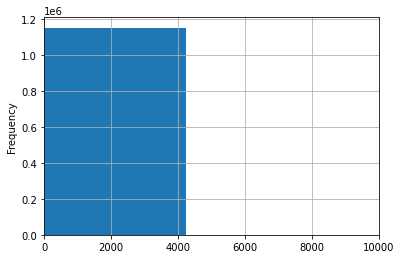

In [8]:
df_jan_21['duration_min'].plot(kind='hist', grid=True, xlim=(0,10000), figsize=(6,4), bins =100);

In [9]:
df_jan_21['duration_min'].between(1,60).value_counts()

True     1109826
False      44286
Name: duration_min, dtype: int64

Leave the rides with duration values between 1 and 60 min. So have to drop 44286 rows

In [10]:
print(len(df_jan_21))

df_jan_21 = df_jan_21[df_jan_21['duration_min'].between(1,60)].reset_index(drop=True)
len(df_jan_21)

1154112


1109826

**Q3. Missing Values for PUlocationID, DOlocationID**

In [11]:
# the factions of missing values for the pickup location ID
print('{:.2%}'.format(df_jan_21['PUlocationID'].isna().sum() / len(df_jan_21)))

83.53%


In [12]:
df_jan_21[['PUlocationID', 'DOlocationID']] = df_jan_21[['PUlocationID', 'DOlocationID']].fillna(-1)

df_jan_21.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration_min
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1.0,-1.0,None,B00009,17.0000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1.0,-1.0,None,B00009,17.0000
2,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1.0,72.0,None,B00037,8.2833
3,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1.0,61.0,None,B00037,15.2167
4,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,-1.0,71.0,None,B00037,9.0500


**Q4. One-hot encoding**

In [13]:
X_train = df_jan_21[['PUlocationID', 'DOlocationID']].copy()
X_train = pd.get_dummies(X_train, columns=['PUlocationID', 'DOlocationID'])

print(X_train.shape)

(1109826, 525)


In [14]:
X_train.head(3)

,PUlocationID_-1.0,PUlocationID_1.0,PUlocationID_2.0,PUlocationID_3.0,PUlocationID_4.0,PUlocationID_5.0,PUlocationID_6.0,PUlocationID_7.0,PUlocationID_8.0,PUlocationID_9.0,...,DOlocationID_256.0,DOlocationID_257.0,DOlocationID_258.0,DOlocationID_259.0,DOlocationID_260.0,DOlocationID_261.0,DOlocationID_262.0,DOlocationID_263.0,DOlocationID_264.0,DOlocationID_265.0
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y_train = df_jan_21['duration_min']

**Q5. Training a model**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
lr = LinearRegression()

In [18]:
# training model
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred_tr = lr.predict(X_train)

In [20]:
print('RMSE on train: {:.3f}'.format(mean_squared_error(y_train, y_pred_tr, squared=False)))

RMSE on train: 10.529


**Q6. Evaluating the model**

In [21]:
# Validation_data
df_feb_21 = pd.read_parquet('../data/fhv_tripdata_2021-02.parquet')

print(df_feb_21.shape)
df_feb_21.head()

(1037692, 7)


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,NaN,NaN,None,B00014
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,None,B00037


In [22]:
# duration
df_feb_21['duration_min'] = \
                round((df_feb_21['dropOff_datetime'] - df_feb_21['pickup_datetime']).dt.total_seconds() / 60, 4)

df_feb_21 = df_feb_21[df_feb_21['duration_min'].between(1,60)].reset_index(drop=True)

print(df_feb_21.shape)
df_feb_21.head()

(990113, 8)


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration_min
0,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021,10.6667
1,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021,14.5667
2,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021,7.9500
3,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,None,B00037,13.8000
4,B00037,2021-02-01 00:00:37,2021-02-01 00:09:35,NaN,61.0,None,B00037,8.9667


In [23]:
# features
df_feb_21[['PUlocationID', 'DOlocationID']] = df_feb_21[['PUlocationID', 'DOlocationID']].fillna(-1)

X_valid = df_feb_21[['PUlocationID', 'DOlocationID']].copy()
X_valid = pd.get_dummies(X_valid, columns=['PUlocationID', 'DOlocationID'])

print(X_valid.shape)
X_valid.head(3)

(990113, 526)


,PUlocationID_-1.0,PUlocationID_1.0,PUlocationID_2.0,PUlocationID_3.0,PUlocationID_4.0,PUlocationID_5.0,PUlocationID_6.0,PUlocationID_7.0,PUlocationID_8.0,PUlocationID_9.0,...,DOlocationID_256.0,DOlocationID_257.0,DOlocationID_258.0,DOlocationID_259.0,DOlocationID_260.0,DOlocationID_261.0,DOlocationID_262.0,DOlocationID_263.0,DOlocationID_264.0,DOlocationID_265.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# X_valid has one extra column
set(X_valid.columns) - set(X_train.columns)

{'DOlocationID_110.0'}

In [25]:
# Drop extra column from valid 
train_col = X_train.columns
X_valid = X_valid[train_col]

X_valid.shape

(990113, 525)

In [26]:
# target
y_valid = df_feb_21['duration_min']

In [27]:
y_pred_val = lr.predict(X_valid)
print('RMSE on valid: {:.3f}'.format(mean_squared_error(y_valid, y_pred_val, squared=False)))

RMSE on valid: 11.014
